In [1]:
using PyPlot
using DataFrames
using Roots

In [2]:
PyPlot.matplotlib.style.use("default-color")

In [3]:
function energy_level(ka, n)::Float64
    return ka * sin(ka * n / 2.) - 5. * cos(ka) * cos(ka * (n / 2. - 1.) )
end;

function non_inter_energy_level(n, N)::Float64
    return 2π * N / n
end


function find_energy_level(n_range)::DataFrame
    ka = [0e0, 10e0]
    nl = []
    for n in n_range
        r = fill(NaN, 10)
        find_r = find_zeros(x -> energy_level(x, n), 0e0, 10e0)
        for nn in 1:minimum([length(r), length(find_r)])
            r[nn] = find_r[nn]
        end
        push!(nl, r)
    end
    df = DataFrame(transpose(hcat(nl...)), :auto)
end;

In [4]:
n_range = 2:0.01:10
df_el = find_energy_level(n_range)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.31384,4.03357,6.9096,9.89275,NaN,NaN,NaN,NaN,NaN,NaN
2,1.31348,4.02643,6.88814,9.85433,NaN,NaN,NaN,NaN,NaN,NaN
3,1.31312,4.01921,6.86617,9.81471,NaN,NaN,NaN,NaN,NaN,NaN
4,1.31276,4.01189,6.84364,9.77379,NaN,NaN,NaN,NaN,NaN,NaN
5,1.3124,4.00447,6.82052,9.73146,NaN,NaN,NaN,NaN,NaN,NaN
6,1.31204,3.99695,6.79677,9.68763,NaN,NaN,NaN,NaN,NaN,NaN
7,1.31168,3.98931,6.77233,9.64222,NaN,NaN,NaN,NaN,NaN,NaN
8,1.31132,3.98155,6.74716,9.59515,NaN,NaN,NaN,NaN,NaN,NaN
9,1.31096,3.97366,6.72123,9.54637,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
non_el1 = [non_inter_energy_level(n, 1) for n in n_range]
non_el2 = [non_inter_energy_level(n, 2) for n in n_range]
non_el3 = [non_inter_energy_level(n, 3) for n in n_range]
non_el4 = [non_inter_energy_level(n, 4) for n in n_range]
non_el5 = [non_inter_energy_level(n, 5) for n in n_range]
non_el6 = [non_inter_energy_level(n, 6) for n in n_range];

In [6]:
n = 5;
r5 = find_zeros(x -> energy_level(x, n), 0e0, 4e0)

3-element Vector{Float64}:
 0.8959249768255272
 1.3873730166535583
 2.841463558840925

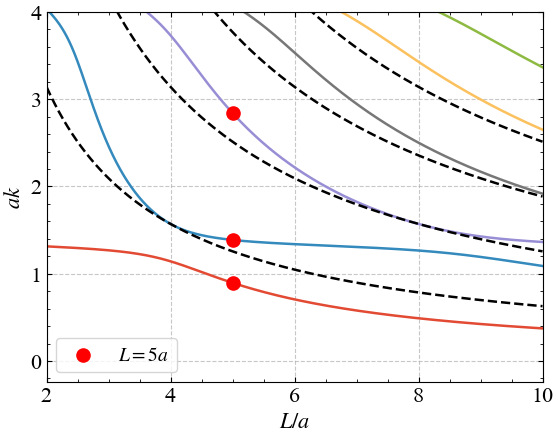

In [7]:
fig, ax = PyPlot.subplots()
ax.plot(n_range, df_el.x1)
ax.plot(n_range, df_el.x2)
ax.plot(n_range, df_el.x3)
ax.plot(n_range, df_el.x4)
ax.plot(n_range, df_el.x5)
ax.plot(n_range, df_el.x6)

# non-interaction energy level
ls = "--"
c = :k
ax.plot(n_range, non_el1, ls=ls, c=c)
ax.plot(n_range, non_el2, ls=ls, c=c)
ax.plot(n_range, non_el3, ls=ls, c=c)
ax.plot(n_range, non_el4, ls=ls, c=c)
# ax.plot(n_range, non_el5, ls=ls, c=c)
# ax.plot(n_range, non_el6, ls=ls, c=c)
# n = 5
ax.scatter(fill(5, 3), r5, s=90, c=:r, zorder=4, label=L"L = 5a")
ax.set(ylim=(nothing, 4), xlim=(2, 10), xlabel=L"L/a", ylabel=L"ak")
ax.grid()
ax.legend()
fig.savefig("./figure/energy_level.pdf")
gcf()